In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import webbrowser
import time
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from git_ignore.config import *
import plotly.graph_objects as go
import re

In [2]:
auth = tweepy.OAuthHandler(twitter_consumer_key, twitter_consumer_secret, twitter_callback_uri)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)
redirect_url = auth.get_authorization_url()

In [3]:
# auth.get_access_token(user_pin_input)
api = tweepy.API(auth)


# Get popular/recent tweets from keyword search

In [4]:
tweets = tweepy.Cursor(api.search, q='Drake', result_type='popular').items(10)

keyword_df = pd.DataFrame()
name = []
location = []
text = []

for tweet in tweets:
    name.append(tweet.user.name)
    location.append(tweet.user.location)
    text.append(tweet.text)

keyword_df['name'] = name
keyword_df['location'] = location
keyword_df['text'] = text

keyword_df

,name,location,text
0,Mrs. Petty,Queendom,Thank you so much for fkn w|me on live yall. #...
1,$Oxtail is a hustle,Toronto,New Drake Nicki and Wayne on the same night as...
2,World Music Awards,,🔝🔟SONGS🌎🎵\n1⃣SwitchItUp #JayB\n2⃣Electric #Kat...
3,Deezer,,Queen @NickiMinaj is back 🔥 \n\nListen to her ...
4,XXL Magazine,,"“Seeing Green” by Nicki Minaj, Drake and Lil W..."
5,Complex Music,,YMCMB BACK.\n\nNicki announces a new collab wi...
6,TIDAL,,"For the first time ever, @NICKIMINAJ's classic..."
7,concrete boy boat,,Drake so fye lol
8,Sizwe Dhlomo,,"Nicki, Drake &amp; Wayne... It’s feeling like ..."
9,Republic Records is streaming Beam Me Up Scotty,New York City,.@NickiMinaj is blessing us tonight with the o...


In [5]:
# tweets = tweepy.Cursor(api.search, q='Drake', result_type='popular').items(1)
# for tweet in tweets:
#     print(type(tweet.text))

In [6]:


fig = go.Figure()

fig.add_trace(go.Table(
        header=dict(values=list(keyword_df.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[keyword_df.name, keyword_df.location, keyword_df.text],
                   fill_color='lavender',
                   align='left'))
    )


fig.show()

# Get tweets from keyword search

# Get location heatmap using location woeid

# Trending tweets from location keyword

In [7]:
cwoeid = 23424775
woeid = 1
  
# fetching the trends
rj_trends = api.trends_place(id = cwoeid)
trends = []
for trend in rj_trends[0]['trends']: 
    if trend['tweet_volume'] is not None and trend['tweet_volume'] > 10000: 
        trends.append((trend['name'], trend['tweet_volume']))

trends.sort(key=lambda x:-x[1])
trends
# rj_trends

[('Israel', 1950814),
 ('Hamas', 698367),
 ('#Gaza_Under_Attack', 653596),
 ('Al Jazeera', 238428),
 ('The IDF', 194567),
 ('Netanyahu', 181369),
 ('Rodrigo', 150816),
 ('The Sun', 135393),
 ('hobi', 108613),
 ('soobin', 103841),
 ('My Dad', 98024),
 ('YEONJUN', 95135),
 ('Associated Press', 94546),
 ('TAEHYUN', 80531),
 ('Lewandowski', 44811),
 ('Bundesliga', 30857),
 ('Leeds', 30066),
 ('Adderall', 19666),
 ('#SaturdayMorning', 19111),
 ('Juve', 18986),
 ('Oxford', 18571),
 ('Bleeding', 15866),
 ('#SaturdayVibes', 13667),
 ('jessie', 13598),
 ('Alonso', 13383),
 ('#Caturday', 13206),
 ('Marshall', 12916),
 ('Chine', 12634),
 ('Porsche', 12029),
 ('Atalanta', 11647),
 ('Frankfurt', 10730)]

In [8]:
import plotly.express as px
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


## Personal Tweets and Analysis

In [9]:
timeline = api.home_timeline()
for tweet in timeline:
    print(f"{tweet.user.name} said {tweet.text}")

Karan Agarwal said I wish my professor could speak at 4X in real time.
Doug Ford said RT @IndiainToronto: The first tranche of 500 ventilators from #Ontario arrive in #India. More life saving equipment will arrive in #India o…
Doug Ford said #TeamOntario hit a new daily record with 154,104 shots in arms yesterday!

Over 6.9 million #COVIDVaccines have bee… https://t.co/OdjUPwNUry
Imran Khan said وباء کے باعث آج ہم نے ایک بے لوث نوجوان کارکن زاہد مہمند کھو دیا۔ زاہد نے پشاور میں ہماری جماعت کو نچلی ترین سطح تک… https://t.co/NBap4ti0M2
Imran Khan said إِنَّا لِلَّٰهِ وَإِنَّا إِلَيْهِ رَاجِعُونَ
Today we lost a dedicated young PTI worker Zahid Mohmand to Covid 19.… https://t.co/DACU8hKAxG
Narendra Modi said Discussed a number of issues during today’s review meeting on COVID-19, including scaling up testing in areas with… https://t.co/jyft5Wv1lx
BBC Breaking News said China becomes only the second country to land a rover on Mars, as its Zhurong robot touches down, state media say https://

# Create an NLP from twitter API

In [4]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)
 
tweet_limit = 200
keyword = 'Drake'
tweets = tweepy.Cursor(api.search, q=keyword, result_type='popular').items(tweet_limit)
tweet_list = []
negative_list = []
neutral_list = []
positive_list = []
# polarity = 0
positive = 0
negative = 0
neutral = 0
for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    compound = score['compound']
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
positive = percentage(positive, len(tweet_list))
negative = percentage(negative, len(tweet_list))
neutral = percentage(neutral, len(tweet_list))
# polarity = percentage(polarity, tweet_limit)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [9]:
# print(round(positive))
# print(round(neutral))
# print(round(negative))

36
58
7


In [101]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print("negative number: ", len(negative_list))
print('neutral number: ',len(neutral_list))
# print(polarity)

total number:  45
positive number:  16
negative number:  3
neutral number:  26


In [14]:
# #Creating new dataframe and new features
# tw_list = pd.DataFrame(tweet_list)
# tw_list["text"] = tw_list[0]
# #Removing RT, Punctuation etc
# remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
# rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([⁰-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
# tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
# tw_list["text"] = tw_list.text.str.lower()
# tw_list.head(10)

In [53]:
# tweet_limit = 50
# keyword = 'israel'
# tweets = tweepy.Cursor(api.search, q=keyword, result_type='popular').items(tweet_limit)
# pos_count = 0
# pos_correct = 0
# neg_count = 0
# neg_correct = 0
# analyzer = SentimentIntensityAnalyzer()

# # for tweet in tweets:
# #     analysis = TextBlob(tweet.text)
# #     if analysis.sentiment.subjectivity < 0.3:
# #         if analysis.sentiment.polarity > 0:
# #             pos_correct += 1
# #         pos_count +=1
# #     if analysis.sentiment.subjectivity < 0.3:
# #         if analysis.sentiment.polarity <= 0:
# #             neg_correct += 1
# #         neg_count +=1 

# # print(pos_count)

# for tweet in tweets:
#     vs = analyzer.polarity_scores(tweet.text)
#     if not vs['neg'] > 0.1:
#         if vs['pos']-vs['neg'] > 0:
#             pos_correct += 1
#         pos_count +=1

#     if not vs['pos'] > 0.1:
#         if vs['pos']-vs['neg'] <= 0:
#             neg_correct += 1
#         neg_count +=1


In [54]:
# print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
# print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))

Positive accuracy = 37.5% via 24 samples
Negative accuracy = 97.14285714285714% via 35 samples


In [86]:

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [87]:
import numpy as np

tweet_polarity = np.zeros(len(tweet_list[0]))
tweet_subjectivity = np.zeros(len(tweet_list[0]))

for idx, tweet in enumerate(tweet_list[0]):
    tweet_polarity[idx] = polarity(tweet)
    tweet_subjectivity[idx] = subjectivity(tweet)

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/harshjhunjhunwala/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



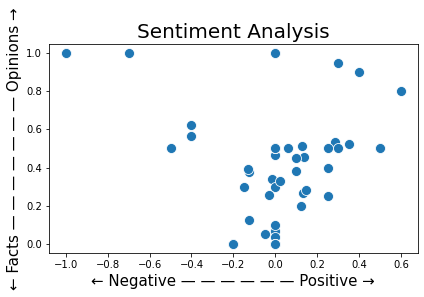

In [89]:
sns.scatterplot(tweet_polarity, # X-axis
                tweet_subjectivity,  # Y-axis
                s=100);


plt.title("Sentiment Analysis", fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.tight_layout()